In [41]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np

In [42]:
batch_size = 128
num_classes = 10
epochs = 12

In [43]:
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [44]:
x_train.shape

(60000, 28, 28)

In [45]:
print(np.max(x_train[0]))
print(np.min(x_train[0]))

255
0


In [46]:
x_predict = x_train[600]

In [47]:
x_train = x_train[0:600]
y_train = y_train[0:600]
x_test = x_test[0:100]
y_test = y_test[0:100]

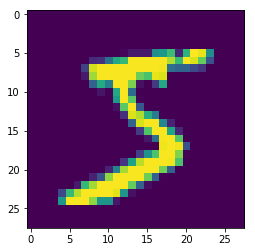

In [48]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [49]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [50]:
print(x_train.shape)
print(x_test.shape)

(600, 28, 28, 1)
(100, 28, 28, 1)


In [51]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [52]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [53]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
metrics=['accuracy'])

In [54]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
validation_data=(x_test, y_test))

Train on 600 samples, validate on 100 samples
Epoch 1/12
600/600 [==============================] - 2s - loss: 13.3018 - acc: 0.1350 - val_loss: 11.2323 - val_acc: 0.2700
Epoch 2/12
600/600 [==============================] - 2s - loss: 11.1350 - acc: 0.2700 - val_loss: 9.7062 - val_acc: 0.3700
Epoch 3/12
600/600 [==============================] - 2s - loss: 9.6683 - acc: 0.3517 - val_loss: 6.3197 - val_acc: 0.5400
Epoch 4/12
600/600 [==============================] - 2s - loss: 8.2297 - acc: 0.4450 - val_loss: 5.0078 - val_acc: 0.6300
Epoch 5/12
600/600 [==============================] - 2s - loss: 6.6143 - acc: 0.5367 - val_loss: 4.5565 - val_acc: 0.6800
Epoch 6/12
600/600 [==============================] - 2s - loss: 5.5798 - acc: 0.6000 - val_loss: 4.8176 - val_acc: 0.6200
Epoch 7/12
600/600 [==============================] - 2s - loss: 4.8046 - acc: 0.6367 - val_loss: 2.8490 - val_acc: 0.7600
Epoch 8/12
600/600 [==============================] - 2s - loss: 3.5021 - acc: 0.7133 - va

In [55]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.750193986893
Test accuracy: 0.85


In [63]:
x_predict = x_train[3]

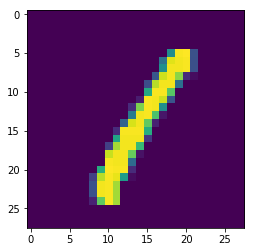

In [64]:
plt.imshow(x_predict[:,:,0])
plt.show()

In [65]:
x_predict = np.expand_dims(x_predict,axis=0)
print(x_predict.shape)

(1, 28, 28, 1)


In [66]:
model.predict_classes(x_predict)

1/1 [==============================] - 0s


array([1])

In [67]:
model.predict(x_predict)

array([[  9.12989476e-12,   9.99999046e-01,   1.81258220e-11,
          3.94185227e-13,   6.91961488e-10,   6.22544447e-11,
          6.65888109e-11,   8.18987586e-11,   1.00874968e-06,
          1.54790384e-12]], dtype=float32)